In [2]:
import pairTrade
from pairTrade import pairTrade
import pandas as pd
import warnings
import pandas.util.testing as tm
from matplotlib import pyplot as plt
import statsmodels.tsa.stattools as ts 
warnings.filterwarnings('ignore')

symbols = pd.read_csv(f"/Users/jochien/Documents/MaxRereach/pair-trade/rawdata/symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv(f"/Users/jochien/Documents/MaxRereach/pair-trade/rawdata/{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]

In [ ]:
norm_prices = df.divide(df.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(symbols)
plt.show()

result_list = []
for a1 in df.columns:
    for a2 in df.columns:
        if a1 != a2:
            test_result = ts.coint(df[a1], df[a2])
            if test_result[1] < 0.05:
                print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))
                result_list.append((a1, a2, test_result[1]))

* tradeType(ratio, spread, returnSpread, regression)
* strategyType: divergence 收斂策略, convergence 發散策略
* actionType: amount等金額購買, unit依比例購買
* entry 進場條件
* exit 出場條件
* stopLoss 停損條件

# ratio

MATICUSDT_ATOMUSDT 回測結果
-----------------------------MATICUSDT-ATOMUSDT--------------------------
初始價格 100000
總損益:  27723.68179099
總交易次數:  49
平均損益:  565.7894243059602
勝率:  0.5510204081632653
獲利因子:  1.2717493618094458
賺賠比:  1.0362402207336223
最大資金回落:  29590.60453465642
夏普比率:  0.07621456213037531


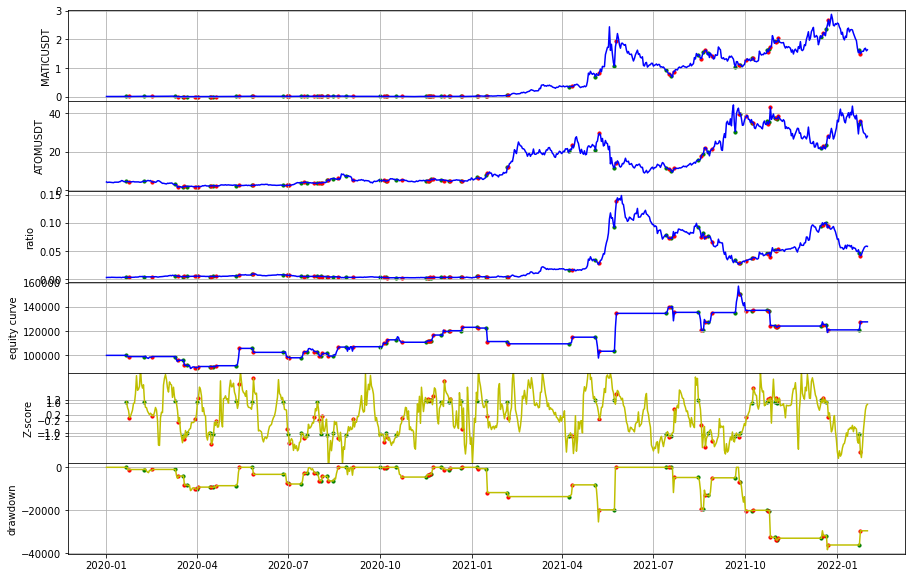

In [3]:
# for i in result_list[:1]:
# df1 = df[[i[0], i[1]]]
df1 = df[['MATICUSDT', 'ATOMUSDT']]
A = pairTrade(df1)
A.indicator(tradeType = 'ratio')
A.strategy(strategyType = 'divergence', actionType = 'amount', entry = 1, exit = 0.2, stopLoss = 1.2)
A.pplot()

In [ ]:
A.df

In [ ]:
print(A.df.available.tolist())

In [ ]:
print(A.df.totalAsset.tolist())

# spread

In [ ]:
# for i in result_list[:3]:
# df1 = df[[i[0], i[1]]]
df1 = df[['MATICUSDT', 'ATOMUSDT']]
A = pairTrade(df1)
A.indicator(tradeType = 'spread')
A.strategy(strategyType = 'divergence', actionType = 'amount', entry = 1, exit = 0.2, stopLoss = 1.2)
A.pplot()

# returnSpread

In [ ]:
# for i in result_list[:3]:
# df1 = df[[i[0], i[1]]]
df1 = df[['MATICUSDT', 'ATOMUSDT']]
A = pairTrade(df1)
A.indicator(tradeType = 'returnSpread')
A.strategy(strategyType = 'divergence', actionType = 'amount', entry = 1, exit = 0.2, stopLoss = 1.2)
A.pplot()

# regression

In [ ]:
# for i in result_list[:3]:
# df1 = df[[i[0], i[1]]]
df1 = df[['MATICUSDT', 'ATOMUSDT']]
A = pairTrade(df1)
A.indicator(tradeType = 'regression')
A.strategy(strategyType = 'divergence', actionType = 'unit', entry = 1, exit = 0.2, stopLoss = 1.2)
A.pplot()

In [ ]:
A.df